In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-housing-dataset/Boston_Housing_DataSet.csv


In [2]:
import pandas as pd

# Load dataset (Example)
df = pd.read_csv("/kaggle/input/the-boston-housing-dataset/Boston_Housing_DataSet.csv")

# Check for missing values
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [3]:
df.fillna(df.mean(), inplace=True)



In [22]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [9]:
print(df.info())  # Summary of dataset (data types, non-null values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [23]:
print(df.describe())

               CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -8.425408e-17  1.579764e-17 -8.425408e-17  1.404235e-17 -1.965929e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 RM           AGE           DIS         RAD         TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  506.000000   
mean  -1.053176e-16  3.370163e-16 -8.425408e-17    0.000000    0.000000   
std    1.000990e+00  1.000990e+00  1.000990e+00    1.000990    

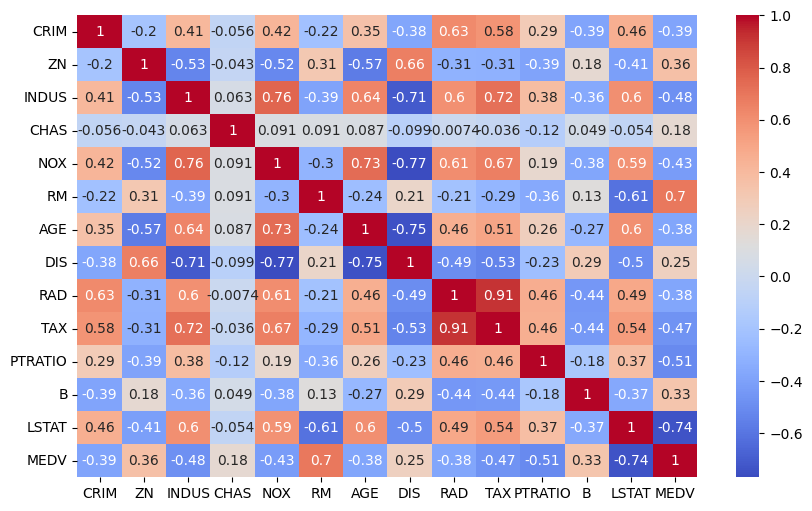

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation heatmap
plt.show()

In [25]:

for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


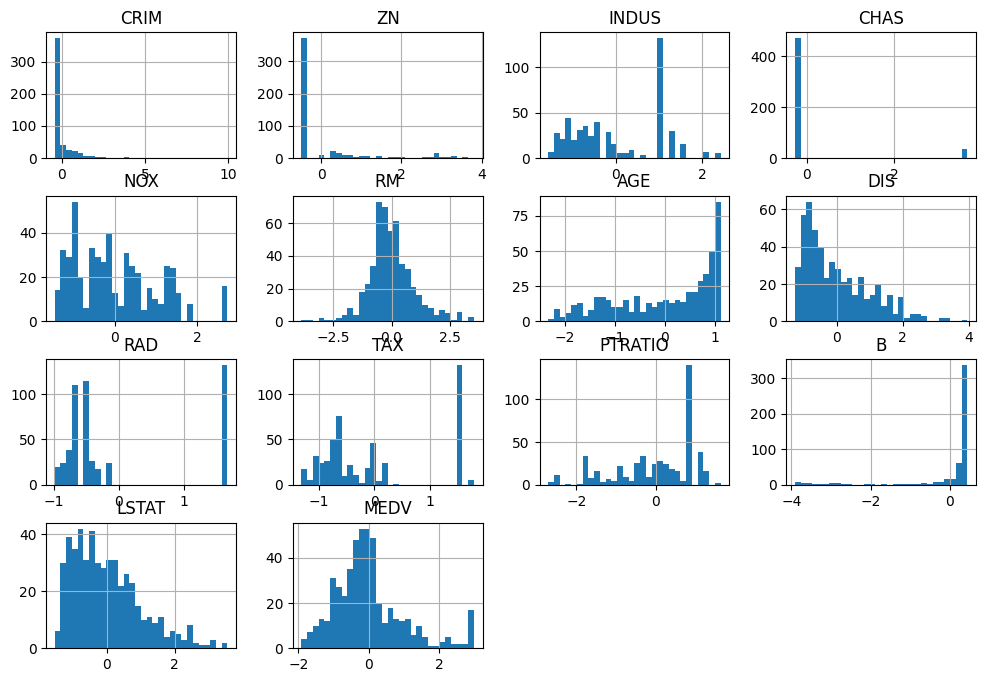

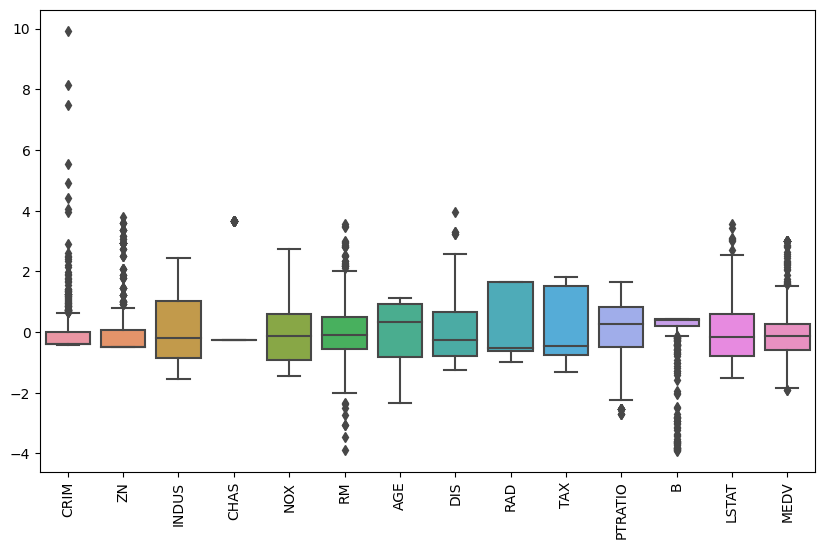

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()


In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

In [29]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)


In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MEDV'])  # Target variable is 'MEDV' (house price)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
print(f"Training data shape: {X_train.shape}")

Training data shape: (404, 13)


In [33]:
print(f"Test data shape: {X_test.shape}")

Test data shape: (102, 13)


In [34]:
df.to_csv("cleaned_dataset_boston_housing.csv", index=False)


In [35]:
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
